In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('NewFinal.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC(probability=True)

# Train classifiers
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    return accuracy, precision, recall, f1, auc, fpr, tpr

# Evaluate all models
logistic_metrics = evaluate_model(logistic_model, X_test, y_test)
decision_tree_metrics = evaluate_model(decision_tree_model, X_test, y_test)
random_forest_metrics = evaluate_model(random_forest_model, X_test, y_test)
svm_metrics = evaluate_model(svm_model, X_test, y_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(logistic_metrics[5], logistic_metrics[6], label='Logistic Regression (AUC = {:.2f})'.format(logistic_metrics[4]))

# Decision Tree
plt.plot(decision_tree_metrics[5], decision_tree_metrics[6], label='Decision Tree (AUC = {:.2f})'.format(decision_tree_metrics[4]))

# Random Forest
plt.plot(random_forest_metrics[5], random_forest_metrics[6], label='Random Forest (AUC = {:.2f})'.format(random_forest_metrics[4]))

# SVM
plt.plot(svm_metrics[5], svm_metrics[6], label='SVM (AUC = {:.2f})'.format(svm_metrics[4]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


C:\Users\lipl_\AppData\Local\Temp\ipykernel_2168\2694828110.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


ValueError: Unknown label type: 'continuous'

C:\Users\lipl_\AppData\Local\Temp\ipykernel_2168\3731511470.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


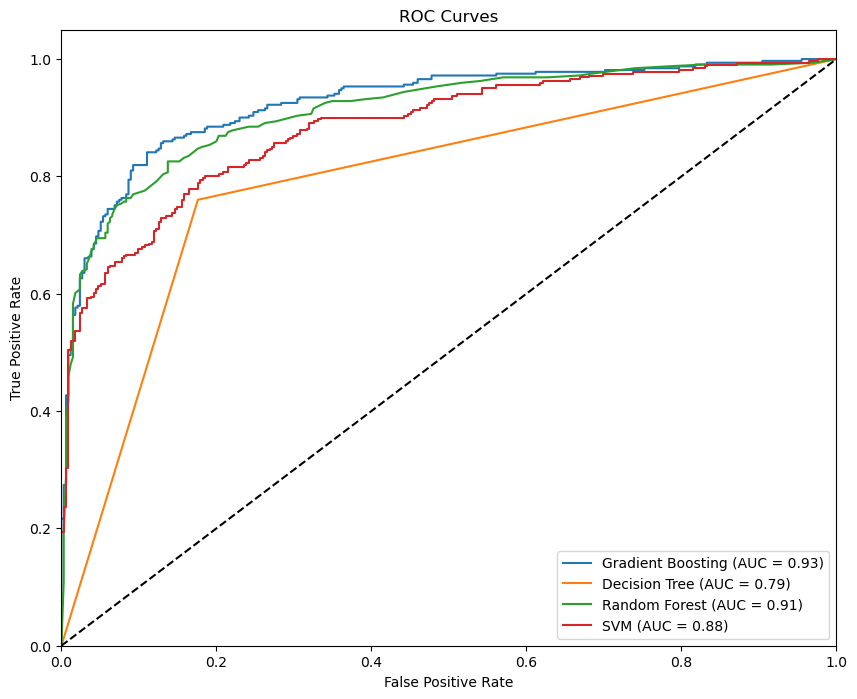

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('NewFinal.xlsx')
# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)
# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
gradient_boosting_model = GradientBoostingClassifier()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC(probability=True)

# Train classifiers
gradient_boosting_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    return accuracy, precision, recall, f1, auc, fpr, tpr

# Evaluate all models
gradient_boosting_metrics = evaluate_model(gradient_boosting_model, X_test, y_test)
decision_tree_metrics = evaluate_model(decision_tree_model, X_test, y_test)
random_forest_metrics = evaluate_model(random_forest_model, X_test, y_test)
svm_metrics = evaluate_model(svm_model, X_test, y_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Gradient Boosting
plt.plot(gradient_boosting_metrics[5], gradient_boosting_metrics[6], label='Gradient Boosting (AUC = {:.2f})'.format(gradient_boosting_metrics[4]))

# Decision Tree
plt.plot(decision_tree_metrics[5], decision_tree_metrics[6], label='Decision Tree (AUC = {:.2f})'.format(decision_tree_metrics[4]))

# Random Forest
plt.plot(random_forest_metrics[5], random_forest_metrics[6], label='Random Forest (AUC = {:.2f})'.format(random_forest_metrics[4]))

# SVM
plt.plot(svm_metrics[5], svm_metrics[6], label='SVM (AUC = {:.2f})'.format(svm_metrics[4]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


Gradient Boosting:
  Accuracy: 0.85
  Precision: 0.89
  Recall: 0.78
  F1 Score: 0.83
  AUC: 0.93

Decision Tree:
  Accuracy: 0.81
  Precision: 0.83
  Recall: 0.77
  F1 Score: 0.80
  AUC: 0.81

Random Forest:
  Accuracy: 0.85
  Precision: 0.89
  Recall: 0.79
  F1 Score: 0.83
  AUC: 0.92

SVM:
  Accuracy: 0.80
  Precision: 0.86
  Recall: 0.72
  F1 Score: 0.78
  AUC: 0.88



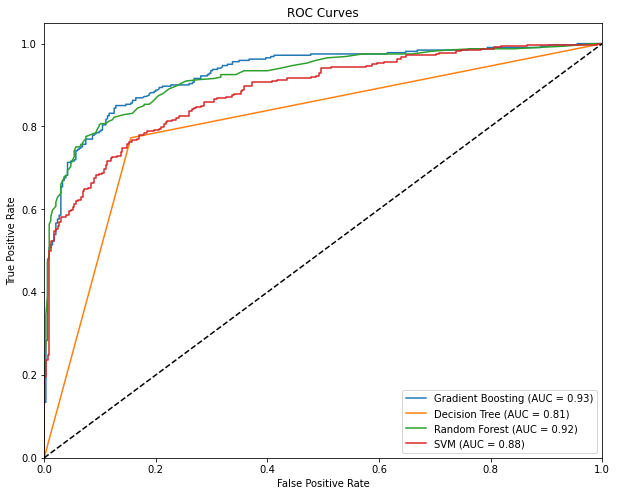

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
gradient_boosting_model = GradientBoostingClassifier()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC(probability=True)

# Train classifiers
gradient_boosting_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    return accuracy, precision, recall, f1, auc, fpr, tpr

# Evaluate all models
gradient_boosting_metrics = evaluate_model(gradient_boosting_model, X_test, y_test)
decision_tree_metrics = evaluate_model(decision_tree_model, X_test, y_test)
random_forest_metrics = evaluate_model(random_forest_model, X_test, y_test)
svm_metrics = evaluate_model(svm_model, X_test, y_test)

# Print the performance metrics for each model
models_metrics = {
    "Gradient Boosting": gradient_boosting_metrics,
    "Decision Tree": decision_tree_metrics,
    "Random Forest": random_forest_metrics,
    "SVM": svm_metrics
}

for model_name, metrics in models_metrics.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics[0]:.2f}")
    print(f"  Precision: {metrics[1]:.2f}")
    print(f"  Recall: {metrics[2]:.2f}")
    print(f"  F1 Score: {metrics[3]:.2f}")
    print(f"  AUC: {metrics[4]:.2f}")
    print()

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Gradient Boosting
plt.plot(gradient_boosting_metrics[5], gradient_boosting_metrics[6], label='Gradient Boosting (AUC = {:.2f})'.format(gradient_boosting_metrics[4]))

# Decision Tree
plt.plot(decision_tree_metrics[5], decision_tree_metrics[6], label='Decision Tree (AUC = {:.2f})'.format(decision_tree_metrics[4]))

# Random Forest
plt.plot(random_forest_metrics[5], random_forest_metrics[6], label='Random Forest (AUC = {:.2f})'.format(random_forest_metrics[4]))

# SVM
plt.plot(svm_metrics[5], svm_metrics[6], label='SVM (AUC = {:.2f})'.format(svm_metrics[4]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


Logistic Regression:
  Accuracy: 0.80
  Precision: 0.84
  Recall: 0.74
  F1 Score: 0.78
  AUC: 0.88

K-Nearest Neighbors:
  Accuracy: 0.77
  Precision: 0.80
  Recall: 0.70
  F1 Score: 0.74
  AUC: 0.84

Naive Bayes:
  Accuracy: 0.72
  Precision: 0.72
  Recall: 0.69
  F1 Score: 0.70
  AUC: 0.81



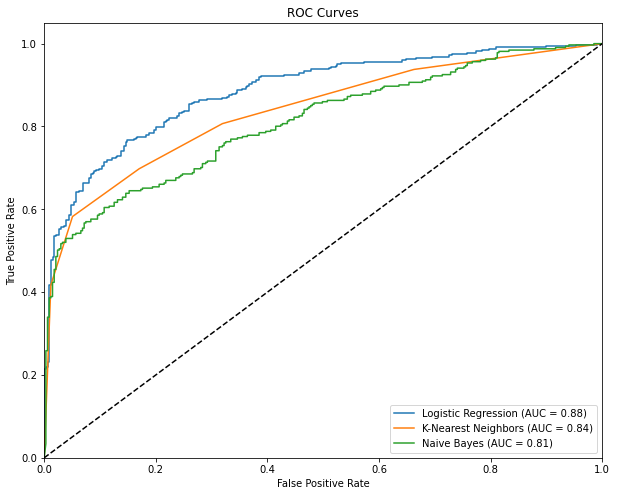

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers (using Logistic Regression, K-Nearest Neighbors, and Naive Bayes)
logistic_regression_model = LogisticRegression()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()

# Train classifiers
logistic_regression_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    return accuracy, precision, recall, f1, auc, fpr, tpr

# Evaluate all models
logistic_regression_metrics = evaluate_model(logistic_regression_model, X_test, y_test)
knn_metrics = evaluate_model(knn_model, X_test, y_test)
naive_bayes_metrics = evaluate_model(naive_bayes_model, X_test, y_test)

# Print the performance metrics for each model
models_metrics = {
    "Logistic Regression": logistic_regression_metrics,
    "K-Nearest Neighbors": knn_metrics,
    "Naive Bayes": naive_bayes_metrics
}

for model_name, metrics in models_metrics.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics[0]:.2f}")
    print(f"  Precision: {metrics[1]:.2f}")
    print(f"  Recall: {metrics[2]:.2f}")
    print(f"  F1 Score: {metrics[3]:.2f}")
    print(f"  AUC: {metrics[4]:.2f}")
    print()

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(logistic_regression_metrics[5], logistic_regression_metrics[6], label='Logistic Regression (AUC = {:.2f})'.format(logistic_regression_metrics[4]))

# K-Nearest Neighbors
plt.plot(knn_metrics[5], knn_metrics[6], label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_metrics[4]))

# Naive Bayes
plt.plot(naive_bayes_metrics[5], naive_bayes_metrics[6], label='Naive Bayes (AUC = {:.2f})'.format(naive_bayes_metrics[4]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


Gradient Boosting Accuracy: 0.85
Random Forest Accuracy: 0.85
Decision Tree Accuracy: 0.79
SVM Accuracy: 0.80
Logistic Regression Accuracy: 0.80
K-Nearest Neighbors Accuracy: 0.77
Naive Bayes Accuracy: 0.72


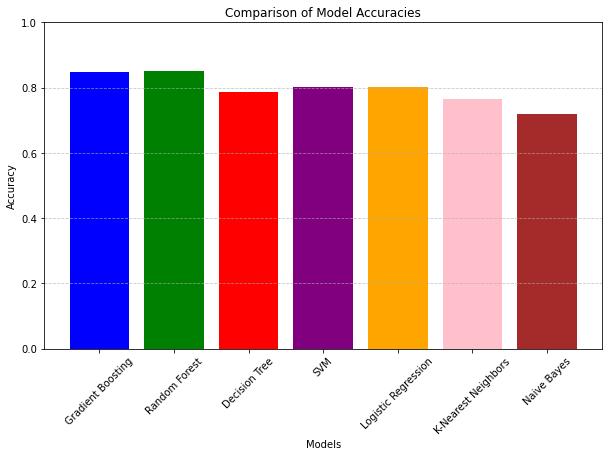

Generating plots for the best model: Random Forest


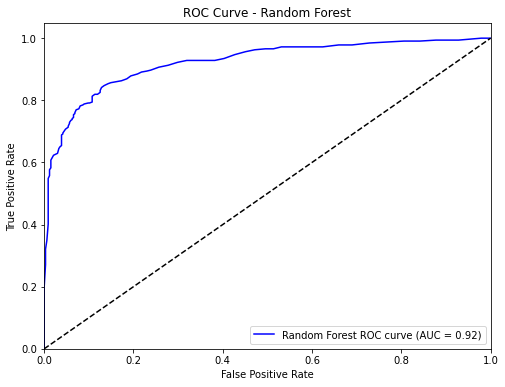

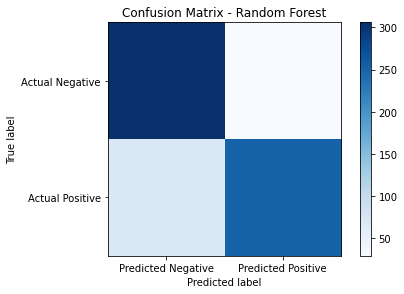

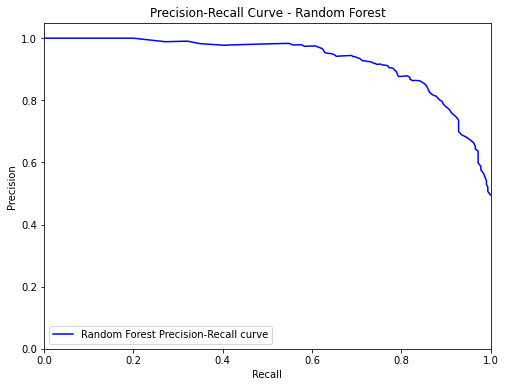

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model

# Evaluate best model and plot necessary metrics
def plot_roc_curve(model, model_name, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'{model_name} ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='k', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_precision_recall_curve(model, model_name, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label=f'{model_name} Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower left")
    plt.show()

# Plot bar chart of accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.0, 1.0])  # Ensure y-axis starts from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot metrics for the best model
if best_model_name:
    print(f"Generating plots for the best model: {best_model_name}")
    plot_roc_curve(best_model, best_model_name, X_test, y_test)
    plot_confusion_matrix(best_model, best_model_name, X_test, y_test)
    plot_precision_recall_curve(best_model, best_model_name, X_test, y_test)
else:
    print("No best model found. Check your models and data.")


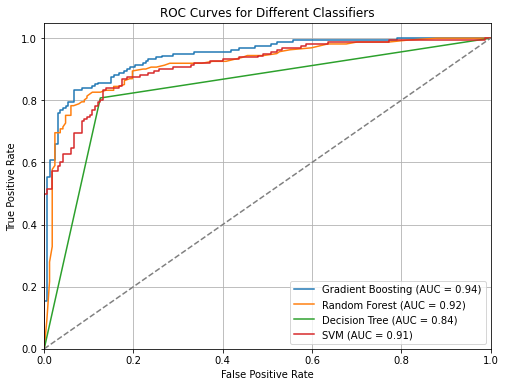

Gradient Boosting Accuracy: 0.87
Random Forest Accuracy: 0.86
Decision Tree Accuracy: 0.84
SVM Accuracy: 0.81

Best model based on accuracy: Gradient Boosting (Accuracy = 0.87)


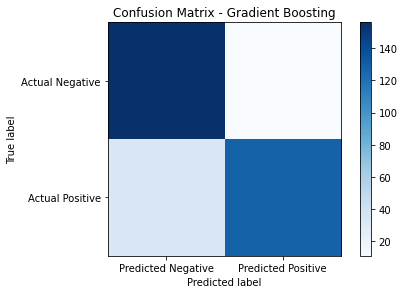

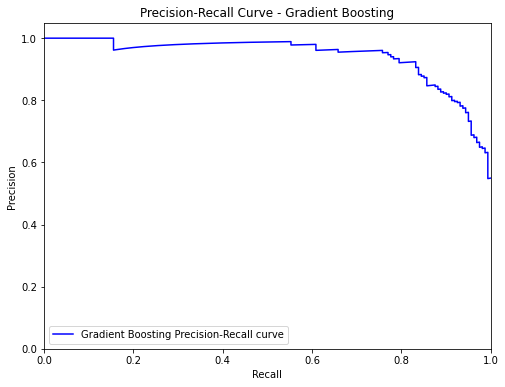

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('NewFinal.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    # Check if this model has higher accuracy than the current best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Print the best model found based on accuracy
if best_model_name:
    print(f"\nBest model based on accuracy: {best_model_name} (Accuracy = {best_accuracy:.2f})")
    plot_confusion_matrix(best_model, best_model_name, X_test, y_test)
    plot_precision_recall_curve(best_model, best_model_name, X_test, y_test)
else:
    print("No best model found. Check your models and data.")


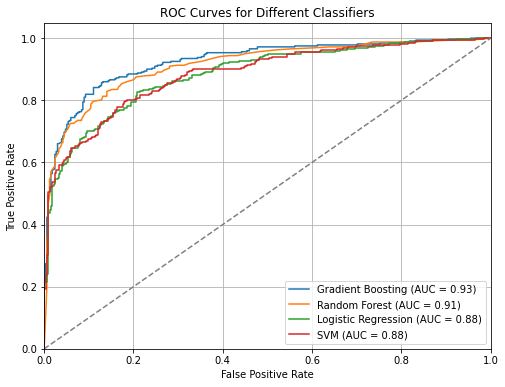

Gradient Boosting Accuracy: 0.86
Random Forest Accuracy: 0.84
Logistic Regression Accuracy: 0.80
SVM Accuracy: 0.79

Best model based on accuracy: Gradient Boosting (Accuracy = 0.86)
Precision: 0.85
Recall: 0.70
F1 Score: 0.77


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


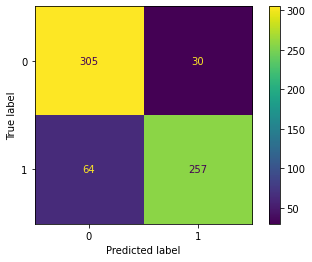

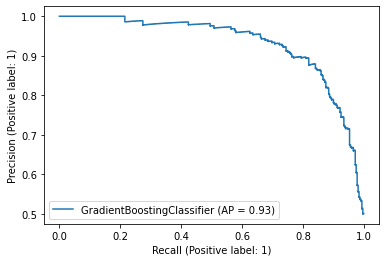

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('NewFinal.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers (reduce to 4 models)
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1_score = 0.0

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    # Check if this model has higher accuracy than the current best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Print the best model found based on accuracy
if best_model_name:
    print(f"\nBest model based on accuracy: {best_model_name} (Accuracy = {best_accuracy:.2f})")
    
    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plot confusion matrix and precision-recall curve for the best model
    plot_confusion_matrix(best_model, X_test, y_test)
    plot_precision_recall_curve(best_model, X_test, y_test)
else:
    print("No best model found. Check your models and data.")


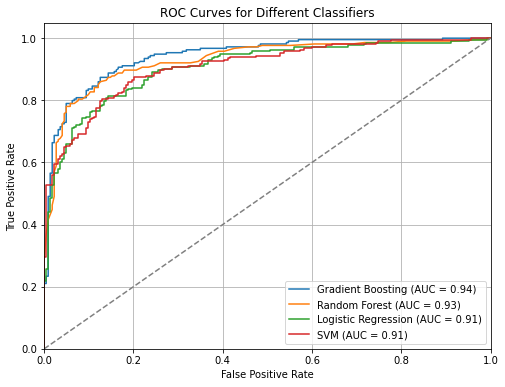

Gradient Boosting Accuracy: 0.86
Random Forest Accuracy: 0.86
Logistic Regression Accuracy: 0.83
SVM Accuracy: 0.82

Best model based on accuracy: Gradient Boosting (Accuracy = 0.86)
Precision: 0.86
Recall: 0.75
F1 Score: 0.80


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


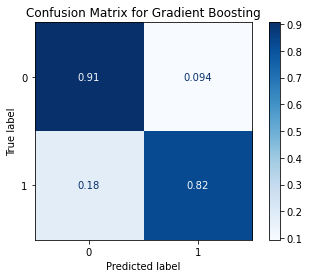

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


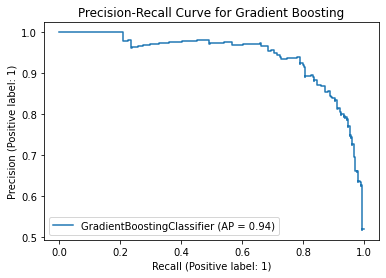

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers (reduce to 4 models)
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1_score = 0.0

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    # Check if this model has higher accuracy than the current best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Print the best model found based on accuracy
if best_model_name:
    print(f"\nBest model based on accuracy: {best_model_name} (Accuracy = {best_accuracy:.2f})")
    
    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plot confusion matrix and precision-recall curve for the best model
    plot_confusion_matrix(best_model, X_test, y_test, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    
    plot_precision_recall_curve(best_model, X_test, y_test)
    plt.title(f'Precision-Recall Curve for {best_model_name}')
    plt.show()
else:
    print("No best model found. Check your models and data.")


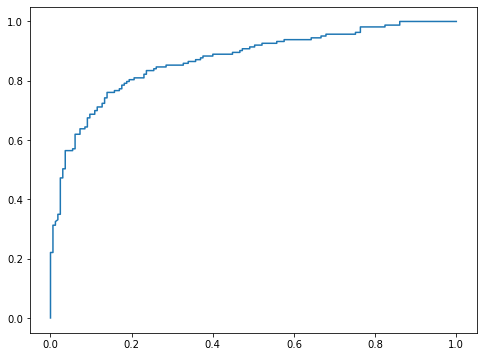

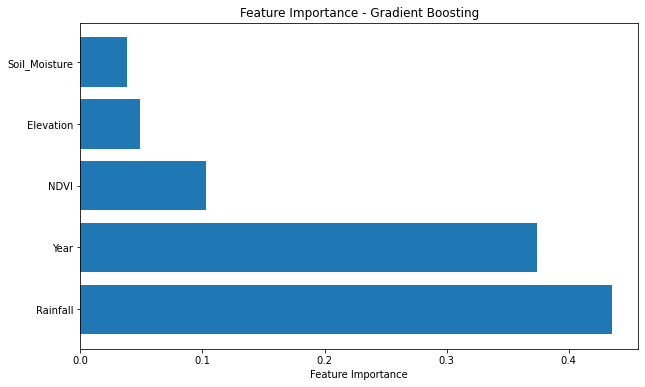

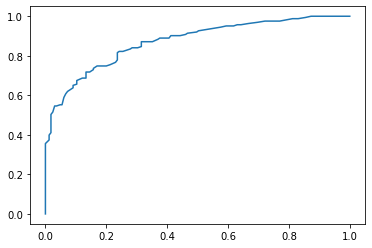

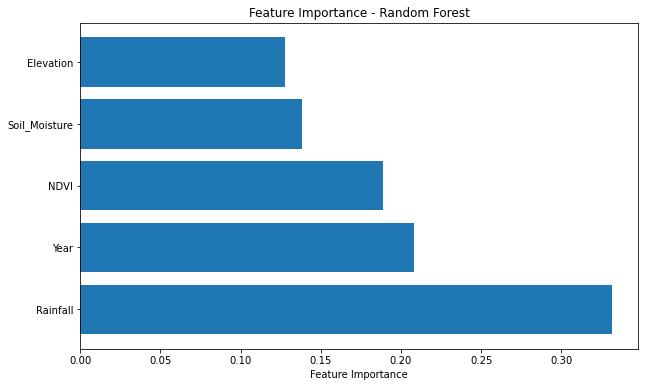

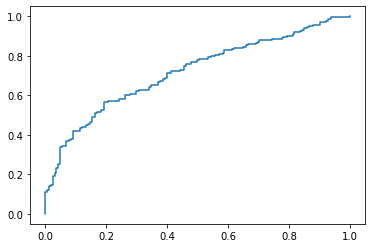

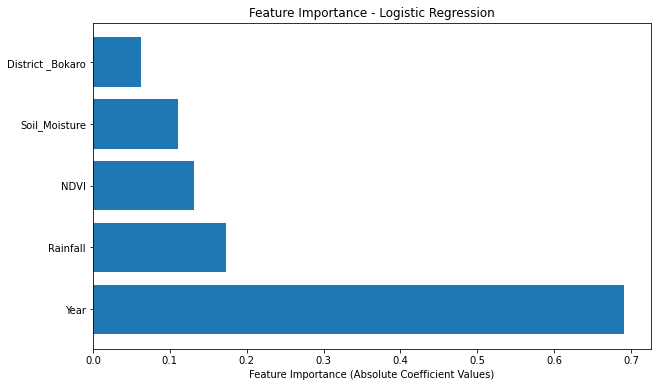

Index(['Year', 'Rainfall', 'Soil_Moisture', 'Elevation', 'NDVI',
       'District _Bokaro'],
      dtype='object')


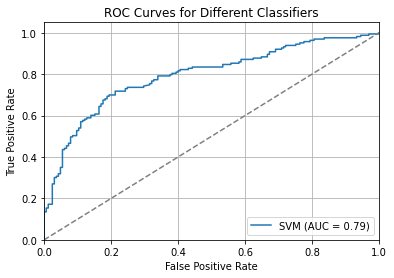

Gradient Boosting Accuracy: 0.80
Random Forest Accuracy: 0.77
Logistic Regression Accuracy: 0.65
SVM Accuracy: 0.72

Best model based on accuracy: Gradient Boosting (Accuracy = 0.80)
Precision: 0.70
Recall: 0.75
F1 Score: 0.73


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


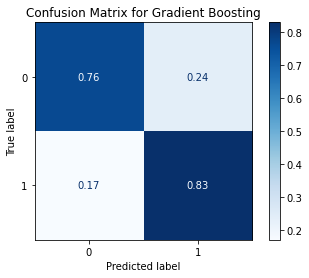

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


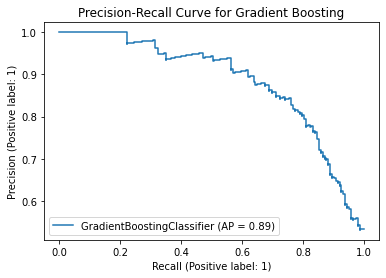

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Select only columns 0 to 5 from X
X = X.iloc[:, 0:6]  # Adjust this range as per your requirement

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers (reduce to 4 models)
models = {
    "Gradient Boosting": GradientBoostingClassifier( n_estimators =50),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1_score = 0.0

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    # Check if this model has higher accuracy than the current best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns[sorted_idx]
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:5]
        feature_importance = feature_importance[0:5]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    elif hasattr(model, 'coef_'):  # For Logistic Regression
        feature_importance = np.abs(model.coef_[0])
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns[sorted_idx]
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:5]
        feature_importance = feature_importance[0:5]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance (Absolute Coefficient Values)')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()
        print(X.columns)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Print the best model found based on accuracy
if best_model_name:
    print(f"\nBest model based on accuracy: {best_model_name} (Accuracy = {best_accuracy:.2f})")
    
    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plot confusion matrix and precision-recall curve for the best model
    plot_confusion_matrix(best_model, X_test, y_test, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    
    plot_precision_recall_curve(best_model, X_test, y_test)
    plt.title(f'Precision-Recall Curve for {best_model_name}')
    plt.show()
else:
    print("No best model found. Check your models and data.")


NameError: name 'x' is not defined

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.7817812943801987


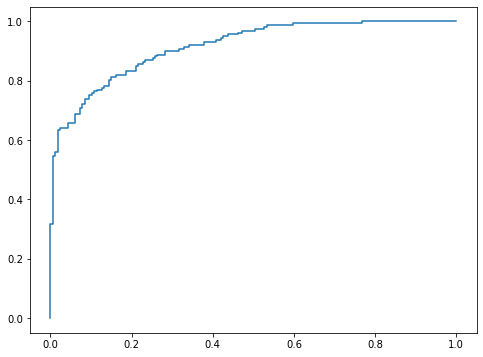

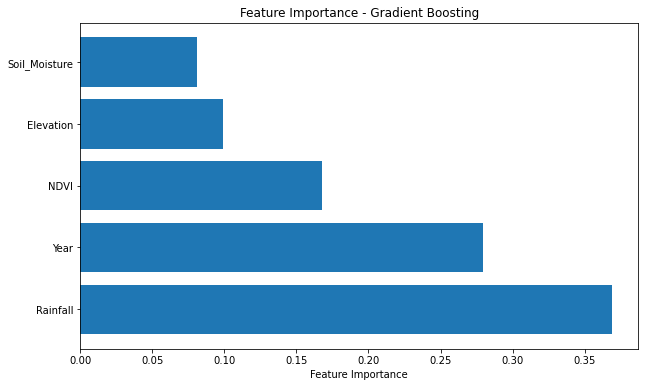

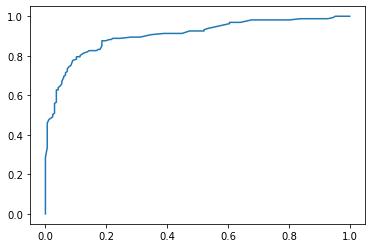

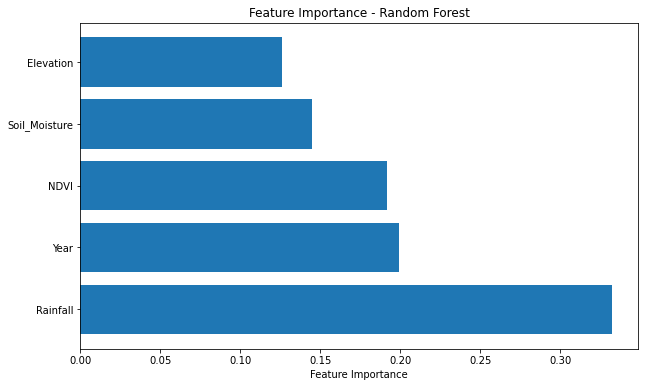

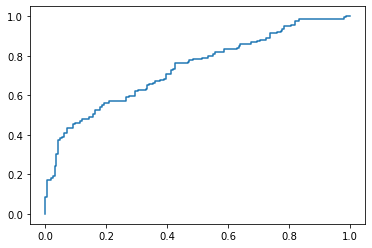

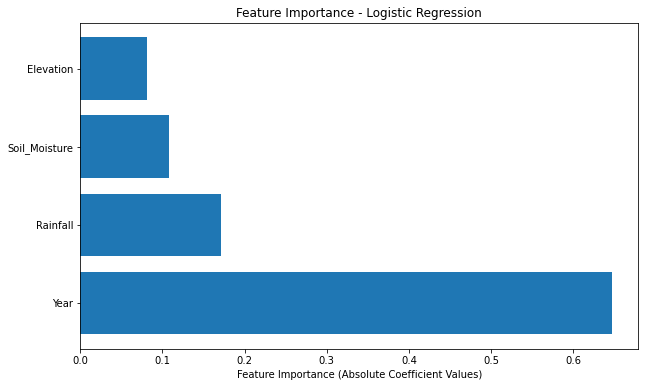

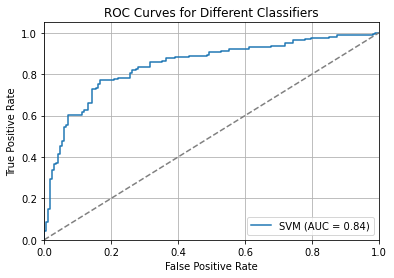

Gradient Boosting Accuracy: 0.83
Random Forest Accuracy: 0.84
Logistic Regression Accuracy: 0.65
SVM Accuracy: 0.78

Best model based on accuracy: Random Forest (Accuracy = 0.84)
Precision: 0.75
Recall: 0.82
F1 Score: 0.78


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


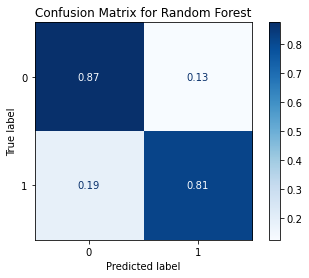

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


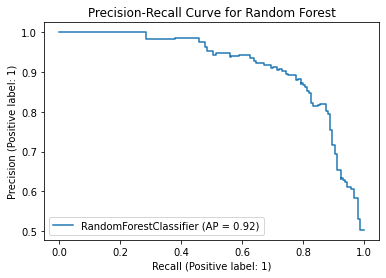

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV  # Import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Select only columns 0 to 5 from X
X = X.iloc[:, 0:6]  # Adjust this range as per your requirement

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best estimator found by GridSearchCV
best_gb_clf = grid_search.best_estimator_

# Initialize other classifiers
models = {
    "Gradient Boosting": best_gb_clf,
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1_score = 0.0

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    # Check if this model has higher accuracy than the current best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns[sorted_idx]
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:5]
        feature_importance = feature_importance[0:5]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    elif hasattr(model, 'coef_'):  # For Logistic Regression
        feature_importance = np.abs(model.coef_[0])
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:4]
        feature_importance = feature_importance[0:4]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance (Absolute Coefficient Values)')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Print the best model found based on accuracy
if best_model_name:
    print(f"\nBest model based on accuracy: {best_model_name} (Accuracy = {best_accuracy:.2f})")
    
    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plot confusion matrix and precision-recall curve for the best model
    plot_confusion_matrix(best_model, X_test, y_test, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    
    plot_precision_recall_curve(best_model, X_test, y_test)
    plt.title(f'Precision-Recall Curve for {best_model_name}')
    plt.show()
else:
    print("No best model found. Check your models and data.")


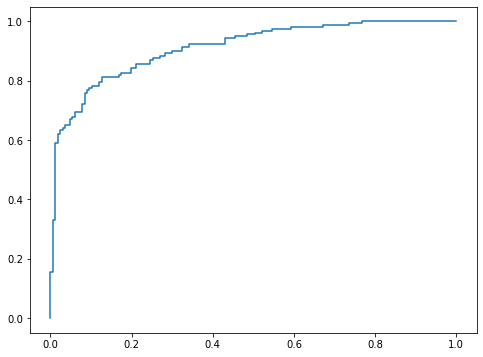

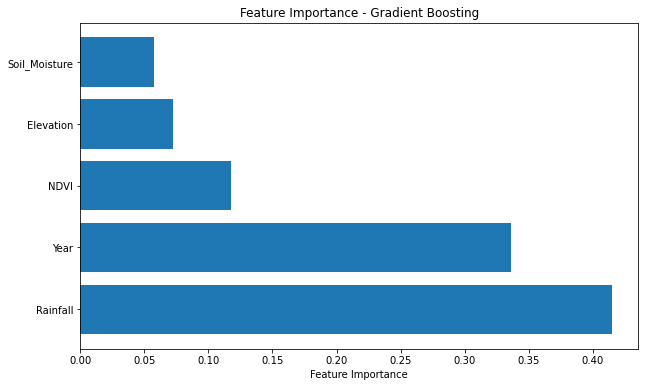

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


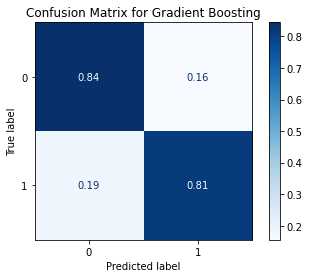

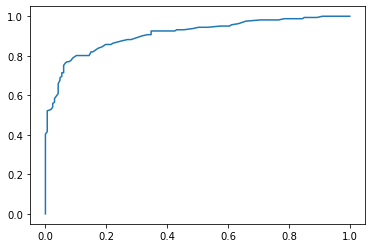

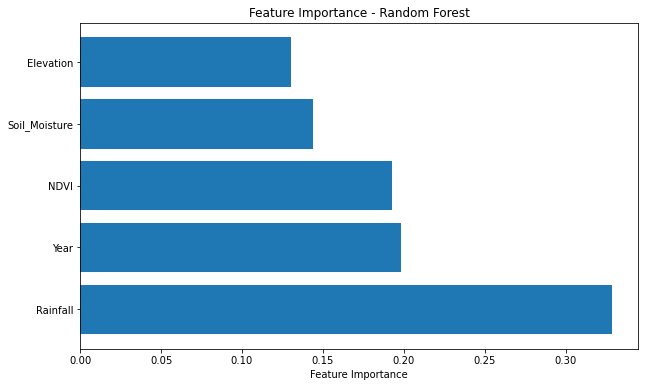

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


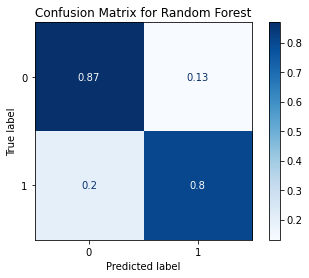

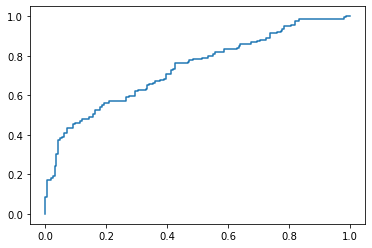

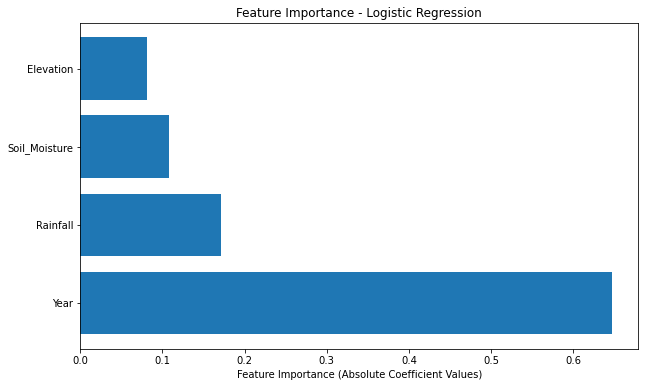

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


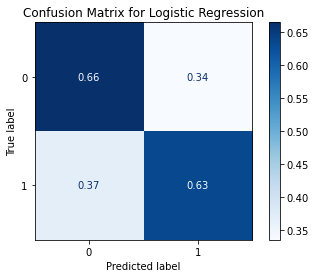

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


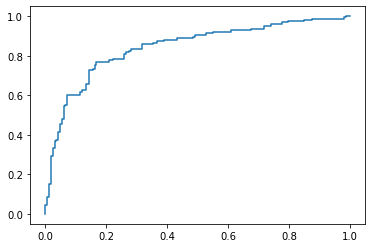

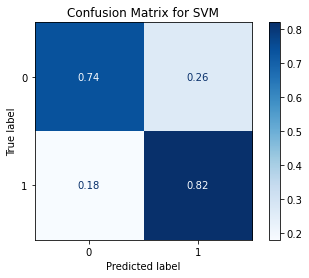

Gradient Boosting Accuracy: 0.83
Random Forest Accuracy: 0.84
Logistic Regression Accuracy: 0.65
SVM Accuracy: 0.78

Best model based on accuracy: Random Forest (Accuracy = 0.84)
Precision: 0.85
Recall: 0.80
F1 Score: 0.83


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


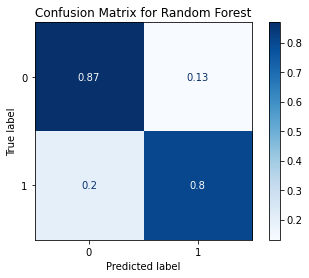

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


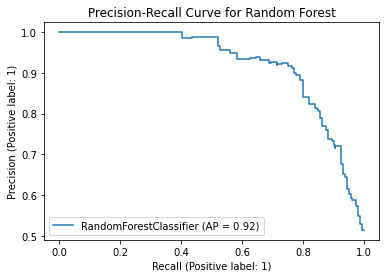

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Select only columns 0 to 5 from X
X = X.iloc[:, 0:6]  # Adjust this range as per your requirement

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier with n_estimators=100 (example)
gb_clf = GradientBoostingClassifier(n_estimators=100)

# Initialize other classifiers
models = {
    "Gradient Boosting": gb_clf,
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1_score = 0.0

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    # Check if this model has higher accuracy than the current best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
        best_y_pred = y_pred  # Save predictions of the best model for later use
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns[sorted_idx]
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:5]
        feature_importance = feature_importance[0:5]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    elif hasattr(model, 'coef_'):  # For Logistic Regression
        feature_importance = np.abs(model.coef_[0])
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:4]
        feature_importance = feature_importance[0:4]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance (Absolute Coefficient Values)')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()
    
    # Plot confusion matrix for every model
    plot_confusion_matrix(model, X_test, y_test, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Print accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Print the best model found based on accuracy
if best_model_name:
    print(f"\nBest model based on accuracy: {best_model_name} (Accuracy = {best_accuracy:.2f})")
    
    # Compute precision, recall, and F1 score for the best model
    precision = precision_score(y_test, best_y_pred)
    recall = recall_score(y_test, best_y_pred)
    f1 = f1_score(y_test, best_y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plot confusion matrix and precision-recall curve for the best model
    plot_confusion_matrix(best_model, X_test, y_test, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    
    plot_precision_recall_curve(best_model, X_test, y_test)
    plt.title(f'Precision-Recall Curve for {best_model_name}')
    plt.show()
else:
    print("No best model found. Check your models and data.")


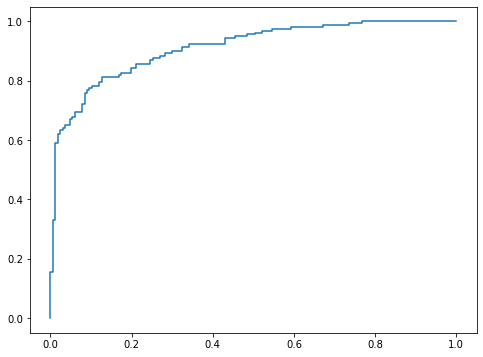

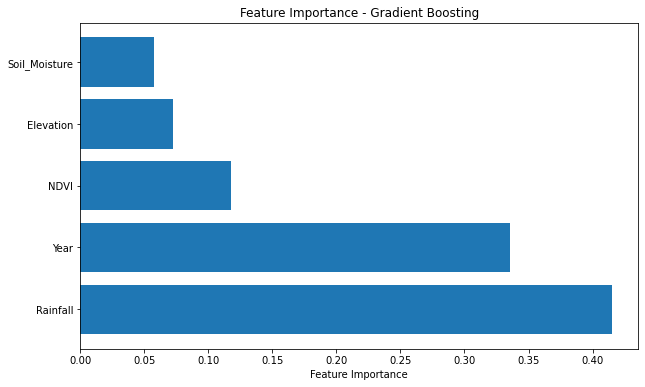

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


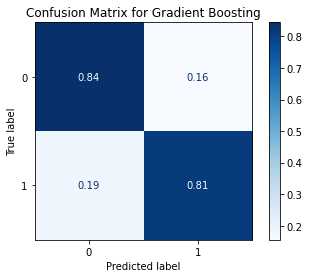

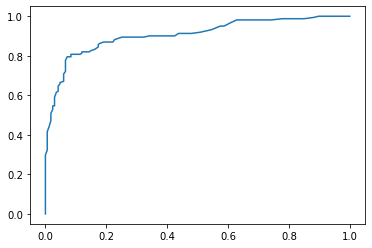

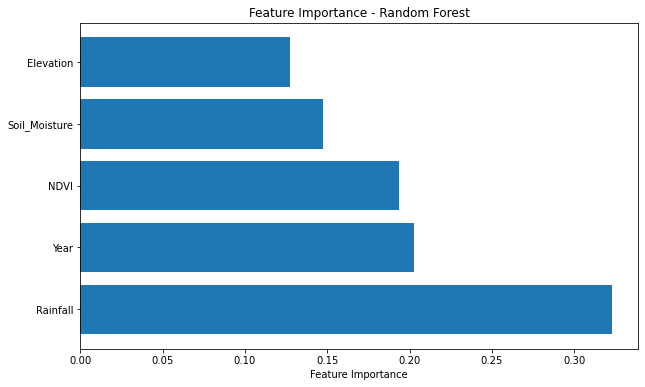

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


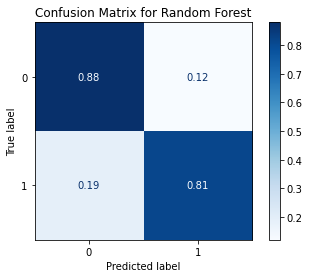

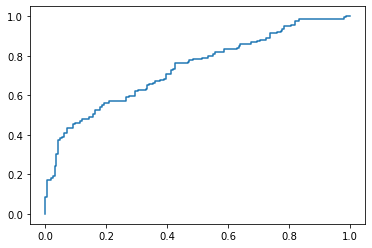

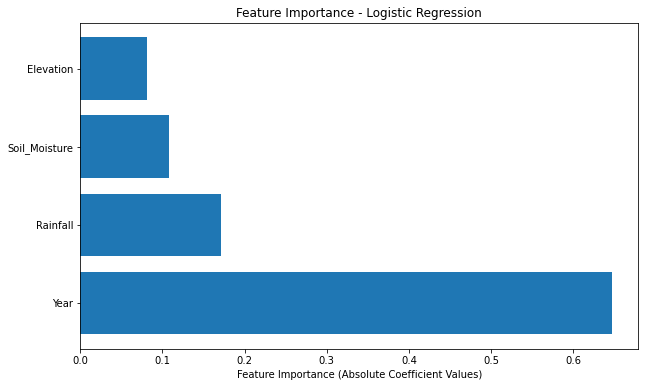

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


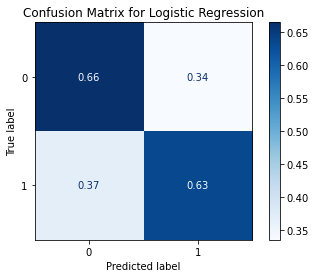

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


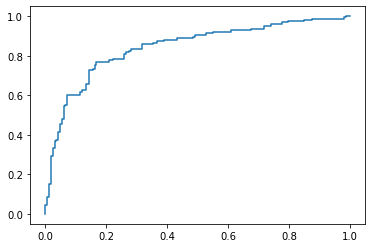

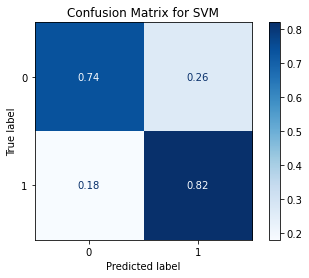

Gradient Boosting Accuracy: 0.83
Random Forest Accuracy: 0.85
Logistic Regression Accuracy: 0.65
SVM Accuracy: 0.78

Best model based on accuracy: Random Forest (Accuracy = 0.85)
Precision: 0.87
Recall: 0.81
F1 Score: 0.84


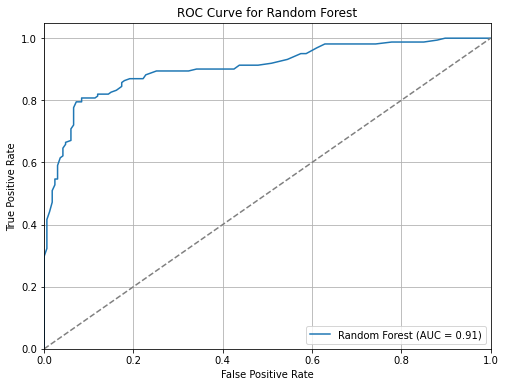

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


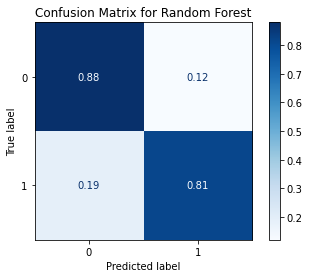

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


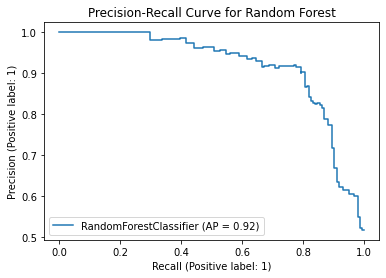

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Load the dataset
data = pd.read_excel('Bok1.xlsx')

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (if any)
data = pd.get_dummies(data)

# Binarize the Waterlevel column (e.g., threshold at the median value)
median_value = data['Waterlevel'].median()
data['Waterlevel'] = (data['Waterlevel'] > median_value).astype(int)

# Split data into features and target
X = data.drop('Waterlevel', axis=1)
y = data['Waterlevel']

# Select only columns 0 to 5 from X
X = X.iloc[:, 0:6]  # Adjust this range as per your requirement

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier with n_estimators=100 (example)
gb_clf = GradientBoostingClassifier(n_estimators=100)

# Initialize other classifiers
models = {
    "Gradient Boosting": gb_clf,
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
}

# Train classifiers and evaluate accuracy
accuracies = {}  # Dictionary to store accuracy scores
best_model_name = None
best_accuracy = 0.0
best_precision = 0.0
best_recall = 0.0
best_f1_score = 0.0

plt.figure(figsize=(8, 6))  # Adjust figure size as needed

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy  # Store accuracy score
    
    # Check if this model has higher accuracy than the current best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model
        best_y_pred = y_pred  # Save predictions of the best model for later use
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns[sorted_idx]
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:5]
        feature_importance = feature_importance[0:5]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()

    elif hasattr(model, 'coef_'):  # For Logistic Regression
        feature_importance = np.abs(model.coef_[0])
        sorted_idx = np.argsort(feature_importance)[::-1]
        feature_names = X.columns
        feature_importance = feature_importance[sorted_idx]
        
        # Select only the first 6 features for plotting
        feature_names = feature_names[0:4]
        feature_importance = feature_importance[0:4]
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, feature_importance, align='center')
        plt.xlabel('Feature Importance (Absolute Coefficient Values)')
        plt.title(f'Feature Importance - {model_name}')
        plt.show()
    
    # Plot confusion matrix for every model
    plot_confusion_matrix(model, X_test, y_test, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Print accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Print the best model found based on accuracy
if best_model_name:
    print(f"\nBest model based on accuracy: {best_model_name} (Accuracy = {best_accuracy:.2f})")
    
    # Compute precision, recall, and F1 score for the best model
    precision = precision_score(y_test, best_y_pred)
    recall = recall_score(y_test, best_y_pred)
    f1 = f1_score(y_test, best_y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plot ROC curve for the best model
    y_prob_best = best_model.predict_proba(X_test)[:, 1]
    fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
    roc_auc_best = roc_auc_score(y_test, y_prob_best)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_best, tpr_best, label=f'{best_model_name} (AUC = {roc_auc_best:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Plot confusion matrix and precision-recall curve for the best model
    plot_confusion_matrix(best_model, X_test, y_test, display_labels=['0', '1'], cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    
    plot_precision_recall_curve(best_model, X_test, y_test)
    plt.title(f'Precision-Recall Curve for {best_model_name}')
    plt.show()
else:
    print("No best model found. Check your models and data.")
